# Análisis exploratorio para analisis de factores de rendimiento en estudiantes (dataset "Student Performance Factors" de Kaggle)

**Ruta del dataset:**
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [1]:
# Cargar paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # Necesario para crear multiples Pie Charts en una figura
from plotly.subplots import make_subplots # Necesario para crear multiples Pie Charts en una figura
#import numpy as np
#import plotly.io as pio
#pio.renderers.default = 'iframe'

In [2]:
# Cargar dataset
data = pd.read_csv(r'StudentPerformanceFactors.csv')

In [3]:
# Visualización inicial de los datos
data

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

### Descrición de los datos
| Atributo | Abreviación | Descripción | Respuestas / Unidades |
| -------- | ------- | ------- | ------- |
| Hours_Studied  | HS | Número de horas empleadas en estudiar a la semana | hrs |
| Attendance | A |Porcentaje de clases asistidas | % |
| Parental_Involvement | PI | Nivel de involucramiento de los padres en la educación del estudiante| Low, Medium, High |
| Access_to_Resources | AtR | Disponibilidad de recursos educativos | Low, Medium, High |
| Extracurricular_Activities | EA | Participación en actividades extracurriculares | Yes, No |
| Sleep_Hours | SH | Horas de sueño al día | hrs |
| Previous_Scores | PS | Calificación en examenes previos | 0-100 |
| Motivation_Level | ML | Nivel de motivación del estudiante | Low, Medium, High |
| Internet_Access | IA | Disponibilidad de acceso a internet | Yes, No |
| Tutoring_Sessions | TS | Número de sesiones de asesoria asistidas al mes | - |
| Family_Income | FI | Nivel de ingresos familiares | Low, Medium, High |
| Teacher_Quality | TQ | Calidad de los profesores | Low, Medium, High |
| School_Type | ST | Tipo de escuela a la que asiste | Public, Private |
| Peer_Influence | PeI | Influencia de los compañeros en el rendimiento académico | Positive, Neutral, Negative |
| Physical_Activity | PA | Núnero proedio de horas dedicadas a realizar actividad física a la semana | hrs |
| Learning_Disabilities | LD | Presencia de discapacidades de aprendizaje  | Yes, No |
| Parental_Education_Level | PEL | Nivel educativo mayor de los padres | High School, College, Postgraduate |
| Distance_from_Home | DfH | Distancia del hogar a la escuela | Near, Moderate, Far |
| Gender	 | G | Género del estudiante | Male, Female |
| Exam_Score | ES | Calificación en el examen final | 0-100 |

Hay un total de **6607** estudiantes.
Los datos tienen **20** atributos.
* Cuantitativos: 7
* Cualitativos: 13
  
El atributo "Exam_Score" es considerado como la variable que se buscaría predecir a través de los otros 19 atributos.

## Visualización de datos cuantitativos

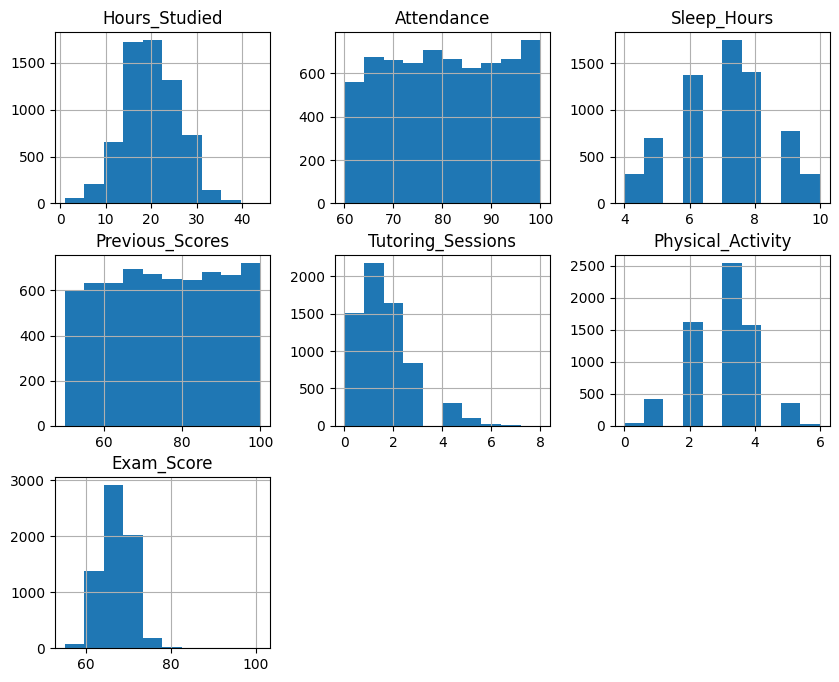

In [4]:
fig = data.hist(figsize=(10, 8)) # Modificar tamaño de los graficos para que se aprecien mejor
plt.show() # Muestra los graficos

Todos los datos cuantitativos son del tipo discreto. 
* **Horas estudiadas:** La mayoría se centra alrededor de las 20 horas, con maximos de 40 y minimo de 1 o 2 horas
* **Asistencia:** Al menos todos los estudiantes asistieron a más de la mitad de las clases. No hay porcentajes de asistencia que resalten mucho más que otros, pero la mayoría asistió a más del 95%.
* **Horas de sueño:** La mayoría de estudiantes duerme 8 horas. Alrededor del 15% duerme solo de 4 a 5 horas, mientras que alrededor de un mismo porcentaje duerme hasta 9 a 10 horas.
* **Calificaciones previas:** No hay puntajes calificaciones previas que resalten mucho más que otros: hay tantos estudiantes reprobados (con calificación de 50) como estudiantes sobresalientes (con 90 o 100 de calificación).
* **Sesiones asesoría:** La gran mayoría recibe menos 2 o menos sesiones de asesoría. Sólo muy pocos reciben hasta 4 sesiones.
* **Actividad física:** La mayoría realiza hasta 4 horas de actividad física a la semana. Muy pocos estudiantes no hacen nadao casi nada de actividad
* **Calificación del examen final:** La gran mayoría obtuvo 70. Ninguno pasó de 80

Como observación, el gráfico de asistencia y el de calificaciones de examenes previos son muy similares, lo que podría sugerir una potencial correlación: a mayor asistencia a clases, mayor calificación.

#### Visualización de los datos cuantitativos con medidas de tendencia central (Violin plot)
Para profundizar en la visualización de los datos cuantitativos, se utilizará un gráfico que permita observar la densidad de los datos.


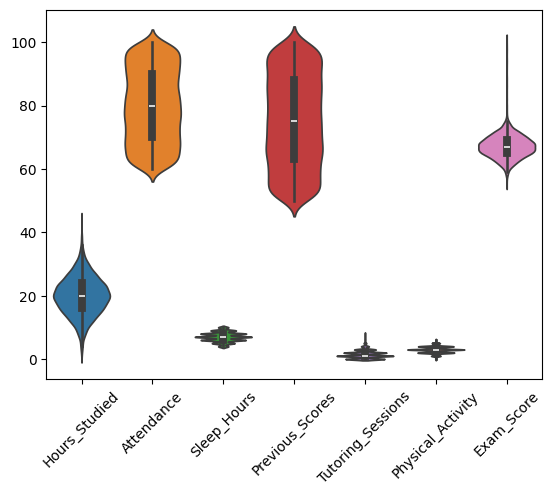

In [5]:
# Visualización de los datos cuantitativos con medidas de tendencia central (Violin plot)
sns.violinplot(data)
plt.xticks(rotation=45)  # Rotar etiquetas para que se visualicen mejor
plt.show()

La interpretación se complica por tener unidades con dimensiones y escalas diferentes en un mismo gráfico. Por lo tanto, es mejor separarlos.

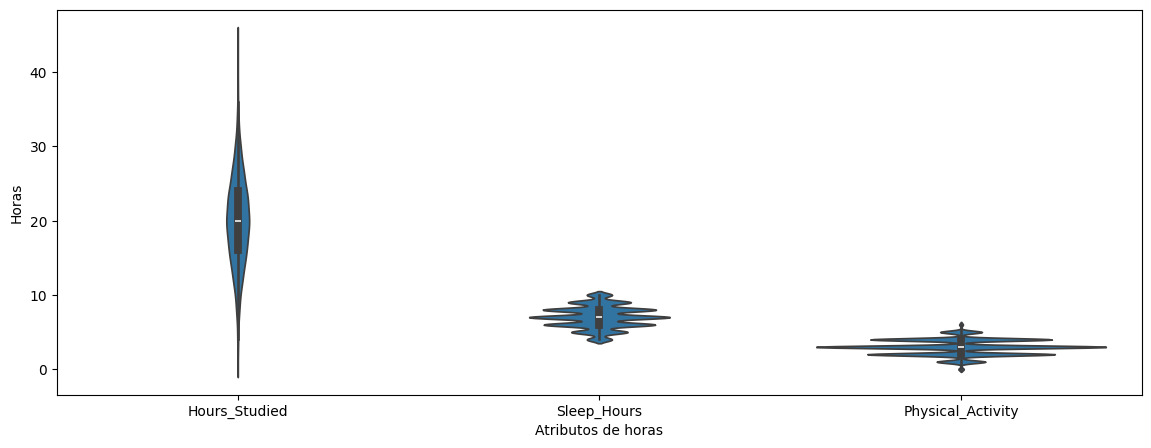

In [6]:
# Separar datos que involucran mediciones de horas
data_hours = pd.melt(data[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']], var_name='Atributos de horas', value_name='Horas')

# Crear el gráfico de violín
plt.figure(figsize=(14, 5))
sns.violinplot(x='Atributos de horas', y='Horas', data=data_hours)
plt.show()

Se juntaron los datos que estuvieran representados por la misma variable, horas. Sin embargo, estas mediciones no son comparables para el atributo **"Horas estudiadas (Hours_Studied)"** por que en esta se consideran las horas a la semana, y no las horas diarias como en las otras variables. 

Con esta visualización, pareciera que la distribución de horas estudiadas es pareja en todos sus valores, y que **"Horas de sueño (Sleep_Hours)"** y **"Actividad física (Physical_Activity)"** son variables discretas.

<Axes: ylabel='Hours_Studied'>

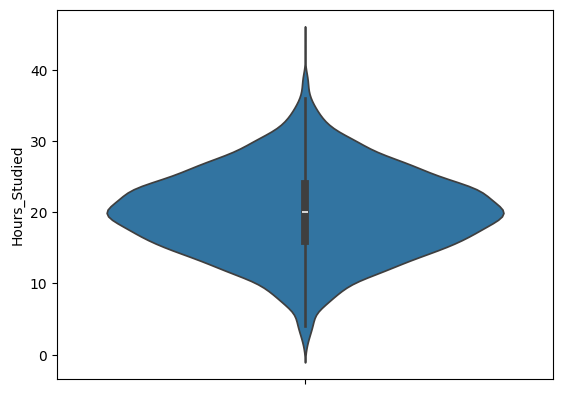

In [7]:
# Visualización de los datos cuantitativos con medidas de tendencia central (Violin plot)
sns.violinplot(data['Hours_Studied'])

Con esta visualización, se aprecia mejor que la distribución está mucho más concentrada en la mediana.

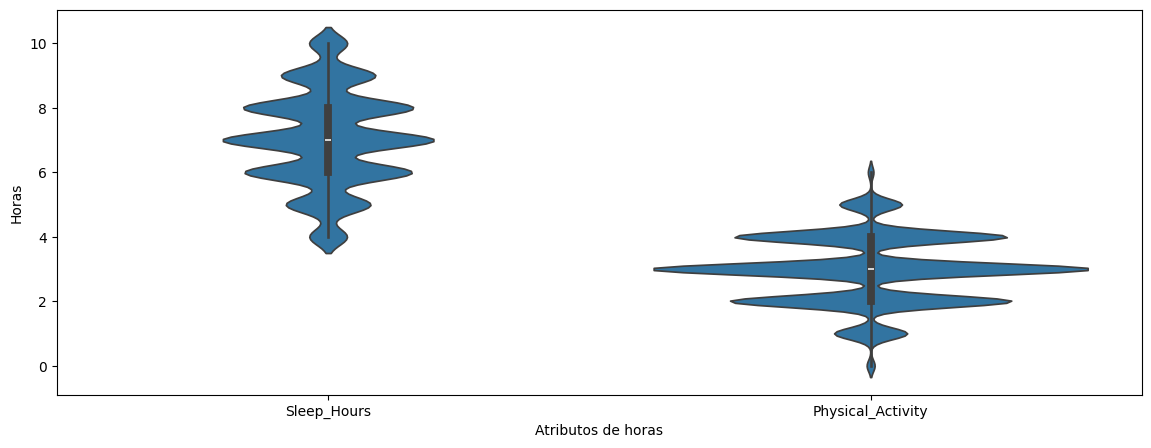

In [8]:
# Separar datos que involucran mediciones de horas
data_hours = pd.melt(data[['Sleep_Hours', 'Physical_Activity']], var_name='Atributos de horas', value_name='Horas')

# Crear el gráfico de violín
plt.figure(figsize=(14, 5))
sns.violinplot(x='Atributos de horas', y='Horas', data=data_hours)
plt.show()

Con esta visualización,es más fácil apreciar que las horas de sueño son mayores que las horas de actividad física, lo cual es esperado.

Dadas estas observaciones, no parece valer la pena observar la **'Asistencia (Attendance)'** ni **'Sesiones de asesoría (Tutoring_Sessions)"**, pues no comparten unidades con otras variables para comparar, y con el histograma ya es posible entender el comportamiento de los atributos.

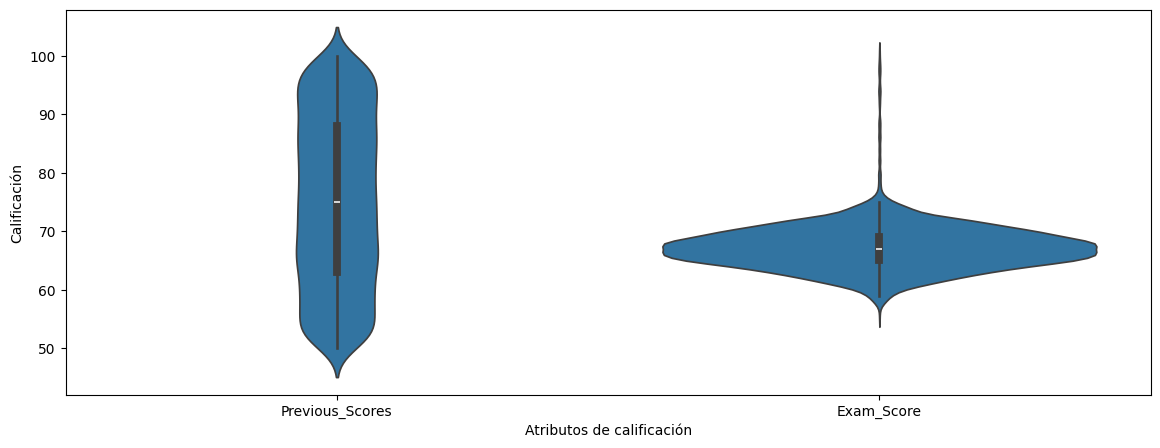

In [9]:
# Separar datos que involucran mediciones de calificaciones
data_hours = pd.melt(data[['Previous_Scores', 'Exam_Score']], var_name='Atributos de calificación', value_name='Calificación')

# Crear el gráfico de violín
plt.figure(figsize=(14, 5))
sns.violinplot(x='Atributos de calificación', y='Calificación', data=data_hours)
plt.show()

Con esta visualización se aprecia de mejor manera que las **"Calificaciones de examenes previos (Previous_Scores)"** tiene una variación uniforme entre todos los valores posibles (de 50 a 100), en cambio, en la **"Calificación del examen final (Exam_Score)"** la mayoría de los estudiantes tiene un rendimiento similar, alrededor de 70. Esto pudiera ser debido a que la dificultad del examen final es mayor, por lo que es más difícil sobresalir. Curiosamente, no hay tantos reprobados en este examen en comparación con los examenes previos.

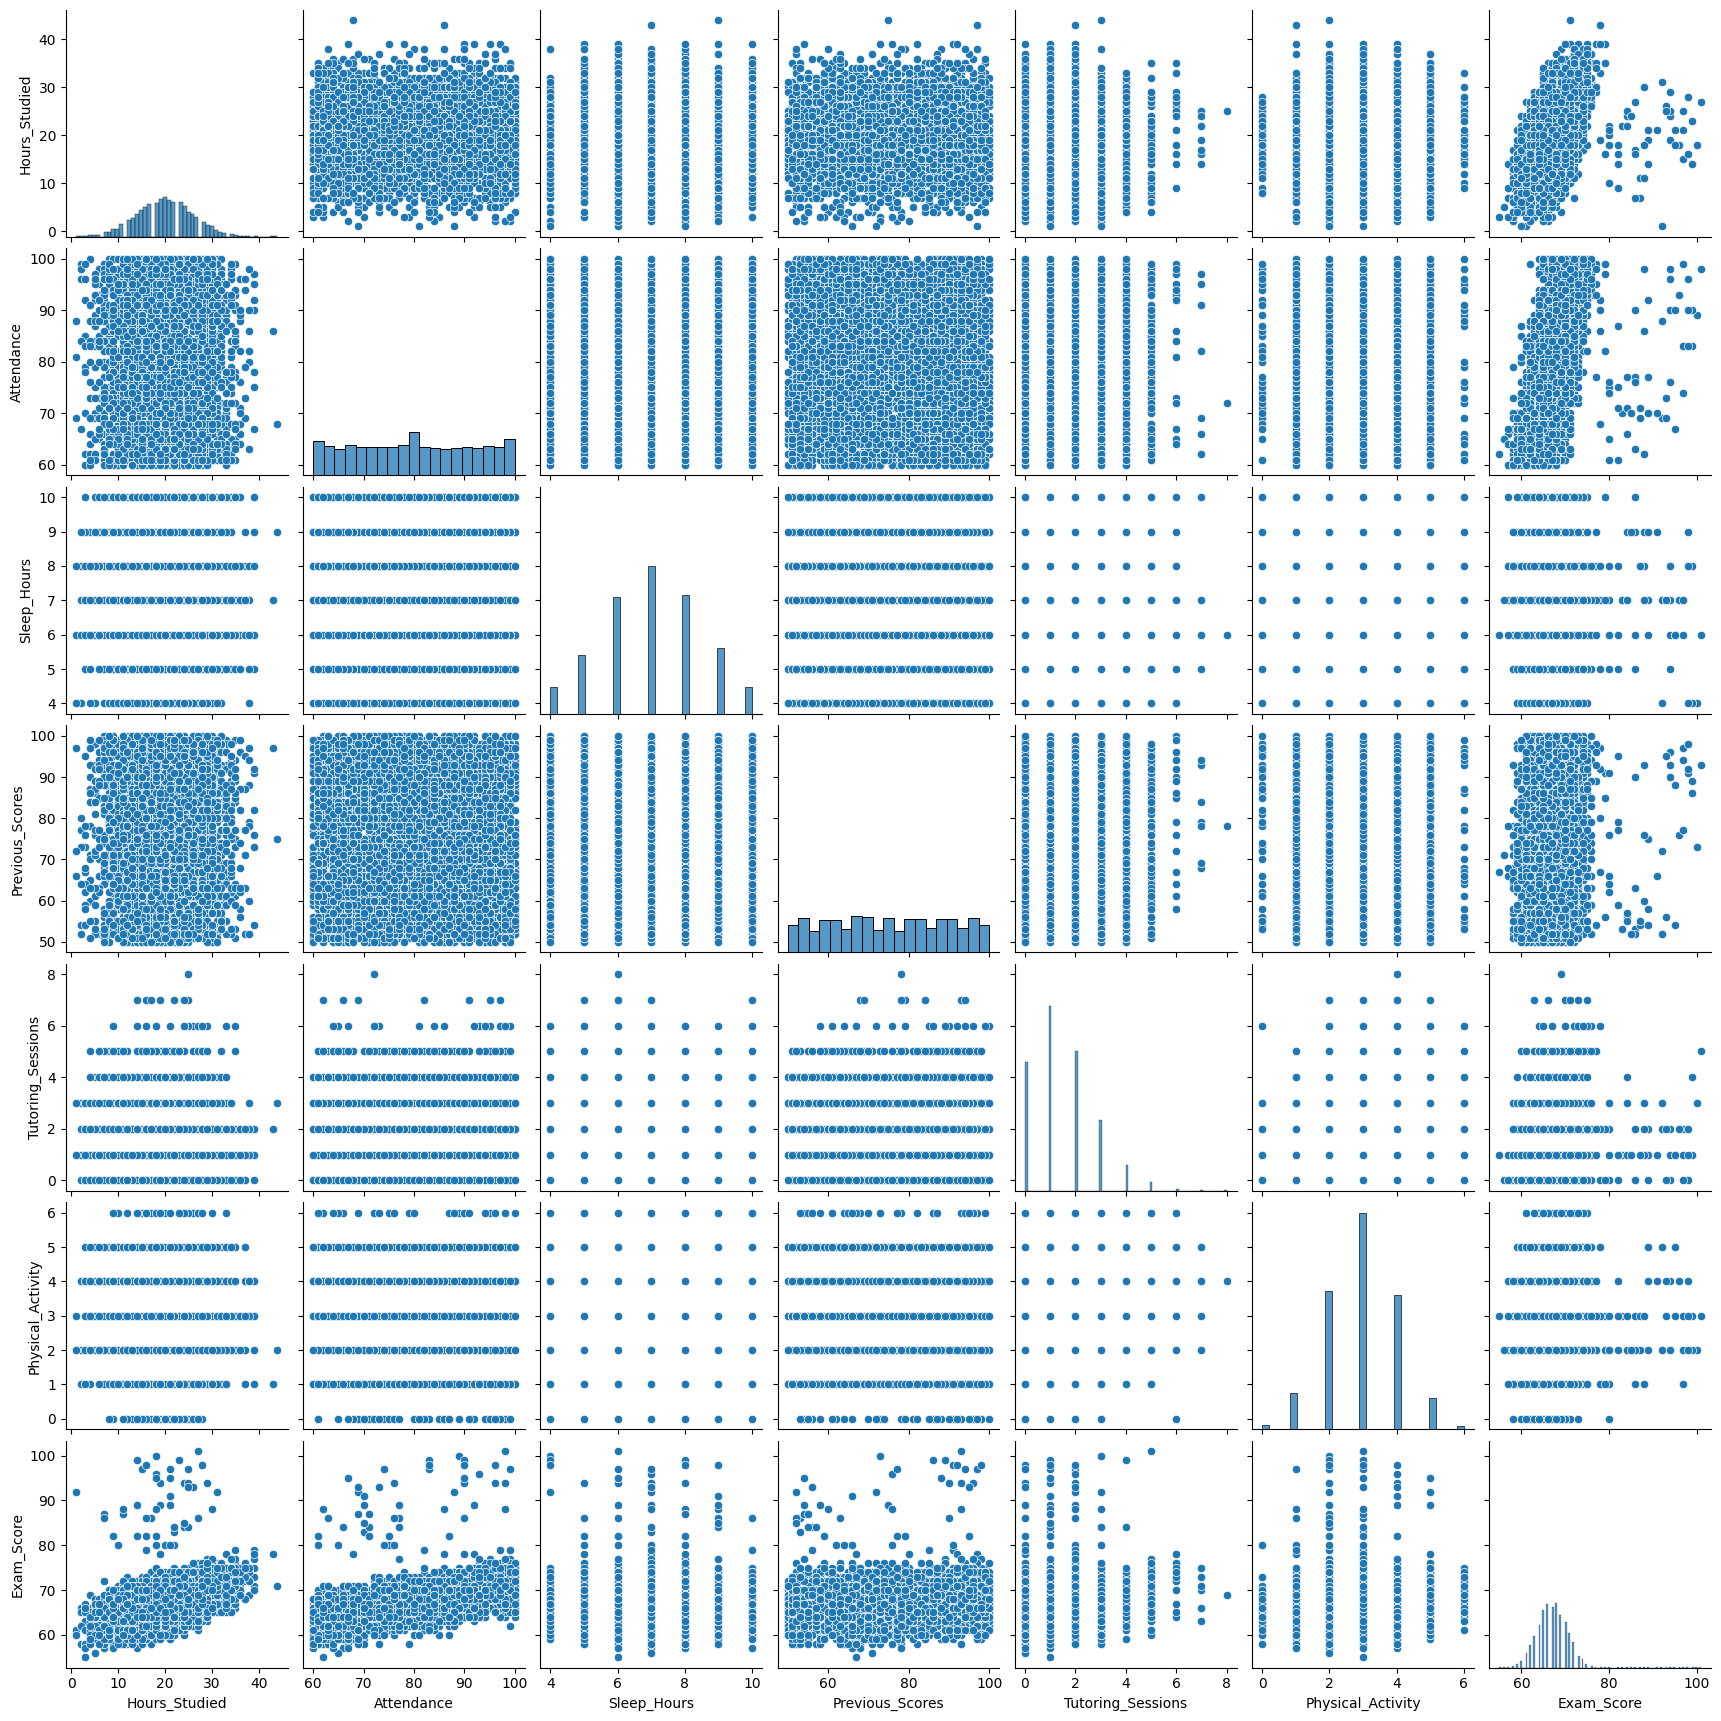

In [10]:
sns.pairplot(data)
plt.show()

Esta visualización no ofrece un claro patrón de la relación de las variables. Sin embargo, se podría resaltar que la comparación de **"Calificación del examen final (Exam_Score)"** con las **"Horas de estudio (Hours_Studied)"**, **"Asistencia"** y **"Calificaciones de examenes previos (Previous_Scores)"** tienen un comportamiento similar. Por la forma de estos gráficos, pareciera que hay una fuerte relación entre horas de estudio, asistencia y el resultado de examenes previos con los resultados del examen final: la gran mayoría de estudiantes se agrupan a la baja, pero una pequeña cantidad de estudiantes sobresale. **Es muy probbale que estas variables cuantitativas son las que tienen mayor impacto en el desempeño de los estudiantes.**

## Visualización de datos cualitativos

Los datos cualitativos requieren mayor preparación para poder visualizarlos. 
Las siguientes lineas de código están intencionadas para preparar y visualizar los datos de una manera lógica y simple.

In [11]:
# Categorical Values
#Parental_Involvement
PI = data['Parental_Involvement'].value_counts()
labels_PI = PI.index
values_PI = PI.values

# Access_to_Resources
AtR = data['Access_to_Resources'].value_counts()
labels_AtR = AtR.index
values_AtR = AtR.values

# Extracurricular_Activities	
EA = data['Extracurricular_Activities'].value_counts()
labels_EA = EA.index
values_EA = EA.values


# Motivation_Level	
ML = data['Motivation_Level'].value_counts()
labels_ML = ML.index
values_ML = ML.values

# Internet_Access	
IA = data['Internet_Access'].value_counts()
labels_IA = IA.index
values_IA = IA.values

# Family_Income	
FI = data['Family_Income'].value_counts()
labels_FI = FI.index
values_FI = FI.values

# Teacher_Quality	
TQ = data['Teacher_Quality'].value_counts()
labels_TQ = TQ.index
values_TQ = TQ.values

# School_Type	
ST = data['School_Type'].value_counts()
labels_ST = ST.index
values_ST = ST.values

# Peer_Influence	
PeI = data['Peer_Influence'].value_counts()
labels_PeI = PeI.index
values_PeI = PeI.values

# Learning_Disabilities	
LD = data['Learning_Disabilities'].value_counts()
labels_LD = LD.index
values_LD = LD.values

# Parental_Education_Level	
PEL = data['Parental_Education_Level'].value_counts()
labels_PEL = PEL.index
values_PEL = PEL.values

# Distance_from_Home	
DfH = data['Distance_from_Home'].value_counts()
labels_DfH = DfH.index
values_DfH = DfH.values

# Gender
G = data['Gender'].value_counts()
labels_G = G.index
values_G = G.values

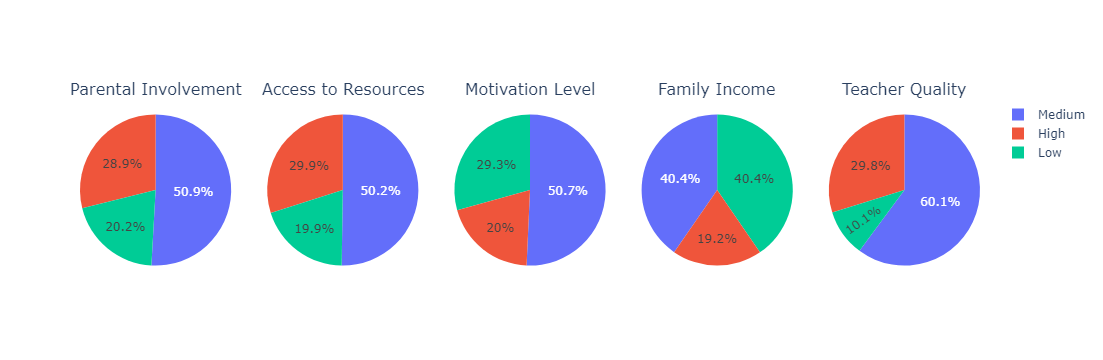

In [12]:
fig = make_subplots(rows=1, cols=5,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}, {'type':'pie'},{'type':'pie'}]],
                    subplot_titles=("Parental Involvement", "Access to Resources", "Motivation Level","Family Income","Teacher Quality"))

fig.add_trace(go.Pie(labels=labels_PI, values=values_PI, name="Parental Involvement"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_AtR, values=values_AtR, name="Access to Resources"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_ML, values=values_ML, name="Motivation Level"), row=1, col=3)
fig.add_trace(go.Pie(labels=labels_FI, values=values_FI, name="Family Income"), row=1, col=4)
fig.add_trace(go.Pie(labels=labels_TQ, values=values_TQ, name="Teacher Quality"), row=1, col=5)

fig.show()

Al observar datos con respuestas iguales es más fácil compararlos. Al parecer, las variables de **"Involucramiento de los padres (Parental Involvement)"**, **"Acceso a recursos (Access to Resources)"**, **"Calidad de los profesores (Teacher Quality)"** y **"Nivel de motivación (Motivation Level)"** y es similar, aunque la motivación está invertida entre *"Alto"* y *"Bajo"* con respecto a los otros atributos. Aunque no se puede asegurar que este patrón se trata de las mismas personas, esto pareciera indicar que las personas con más obstaculos tiene una mayor motivación para estudiar, lo cual en algunos casos podría sonar contradictorio.
Los **"Ingresos familiares (Family Income)"** también parecen estar involucrados en este patrón, aunque las respuestas varían más por lo que es más 

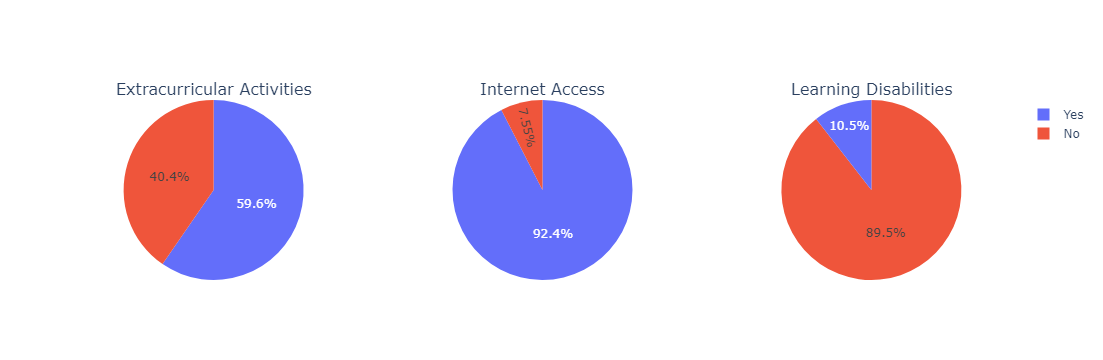

In [13]:
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("Extracurricular Activities","Internet Access","Learning Disabilities"))

fig.add_trace(go.Pie(labels=labels_EA, values=values_EA, name="Extracurricular Activities"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_IA, values=values_IA, name="Internet Access"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_LD, values=values_LD, name="Learning Disabilities"), row=1, col=3)

fig.show()

No parece haber una relación clara a simple vista entre estas variables y las ya mencionadas, o incluso con las calificaciones finales.

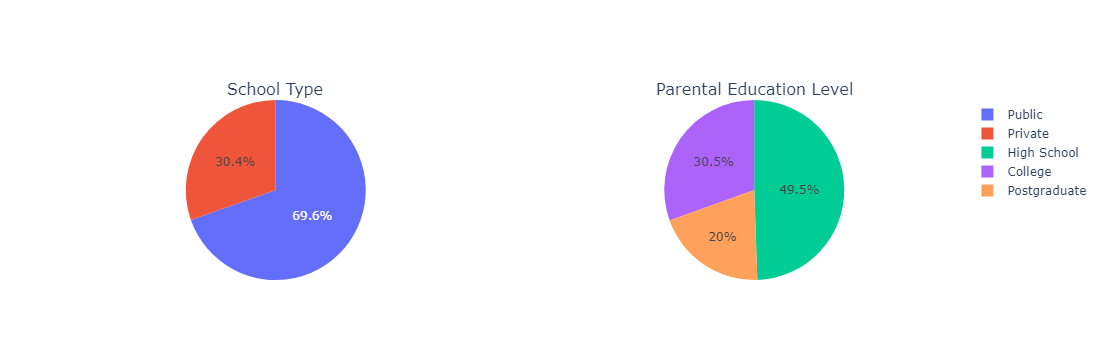

In [14]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("School Type","Parental Education Level"))

fig.add_trace(go.Pie(labels=labels_ST, values=values_ST, name="School Type"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_PEL, values=values_PEL, name="Parental Education Level"), row=1, col=2)

fig.show()

Aquí se juntaron los datos relacionados con la escuela, ya sea del estudiante o de los padres. El **"Nivel educativo de los padres (Parental Education Level)"** parece también seguir un patrón similar a los de "Involucramiento de los padres (Parental Involvement)", "Acceso a recursos (Access to Resources)", y "Calidad de los profesores (Teacher Quality)". Sin embargo, de nuevo, no podemos asegurar que se trata de las mismas personas.

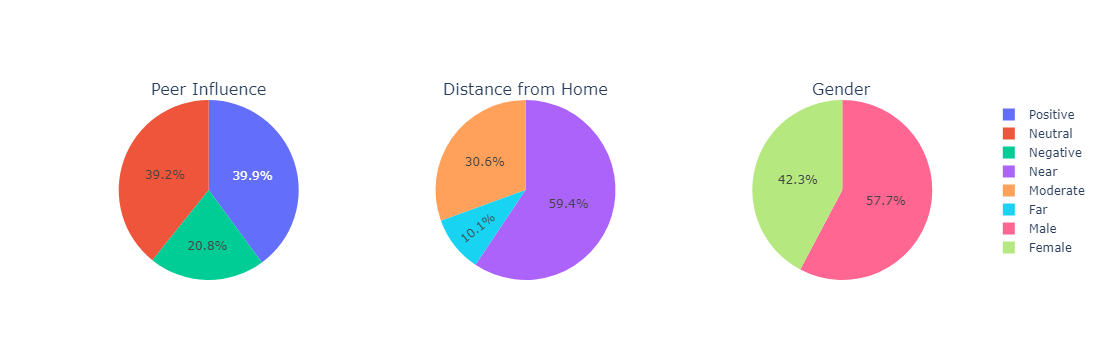

In [15]:
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("Peer Influence","Distance from Home","Gender"))

fig.add_trace(go.Pie(labels=labels_PeI, values=values_PeI, name="Peer Influence"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_DfH, values=values_DfH, name="Distance from Home"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_G, values=values_G, name="Gender"), row=1, col=3)

fig.show()

Aunque la **"Distancia desde casa (Distance from Home)"** pareciera tener un patrón similar con atributos anteriores, no es tan fácil hacer la interpretación. Para los otros atributos tampoco parece haber manera de relacionarlo directamente con esta visualización.

### Conclusión
Estas visuaizaciones explorativos resultaron ser más útiles al ver los datos cuantitativos que los cualitativos. Esto tiene sentido, ya que la variable que buscamos evaluar también es cuantitativa, por lo que la relación es más directa y fáci de interpretar.

Para poder comprender mejor lo que nos dicen los datos, **es necesario evaluar cuál es el estatus de los estudiantes sobresalientes en comparación con los estudiantes regulares, y así entender mejor de que manera se relacionan las variables cualitativas con las cuantitativas**. Utilizando únicamente visualizaciones de tendencia hace que sea complicado hacer aseveraciones.